Welcome to today's lab!  

The main priority today will be to introduce ourselves to the SciKit learn API and fit a decision tree on a dataset and understand its main points.  

Today's lab will lay a foundation for working with more sophisticated models that represent the edge of machine learning.

**"Everything in scikit-learn is numpy in and numpy out"**

**Sci-kit learn basically has three methods: fit, predict, score**

In [4]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor

**Step 1:**  Load in the file `housing.csv`

In [5]:
df = pd.read_csv('/Users/ethanalter/Dropbox (Personal)/GA-4K-DataScience/git-class-do_not_modify/dat-11-15/Homework/Unit2/data/housing.csv')# your code here

In [6]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


**Step 2:** Declare `X` & `y`

`y` is the `PRICE` column, and `X` is every numeric column except `PRICE`.

In [7]:
X = df.iloc[:,:-1] #grab all rows and every column except the last one 
Y = df['PRICE']

**Step 3:** Initialize a `DecisionTreeRegressor` with a `max_depth` of 3, and fit it on `X` and `y`

In [10]:
tree = DecisionTreeRegressor(max_depth = 3)
tree.fit(X,Y)

DecisionTreeRegressor(max_depth=3)

**Step 4:** Call `plot_tree` to visualize the results

In [11]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

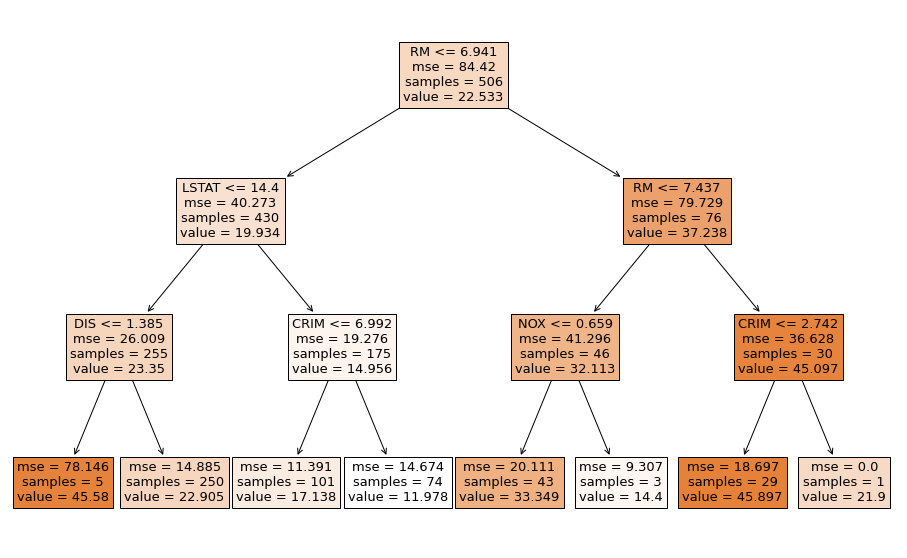

In [13]:
plt.figure(figsize = (16,10))
plot_tree(tree, filled=True, fontsize = 13, feature_names = X.columns);

**Step 5:** Call the `predict` method on your original dataset.  Look at the results, and make sure you can make sense out of them/

In [16]:
df['prediction'] = tree.predict(X)

**Step 6:** call the `score` method on your model, and pass in `X` and `y` as arguments.  We'll talk about the results of this after the lab

In [17]:
tree.score(X,Y)
#Return the mean accuracy on the given test data and labels.

0.8177924678036443

**Step 7:** Try changing the following parameters to see what they do.  It might help to draw the tree after you are done fitting to see what has changed.  If you want some guidance you can look at the source page for the scikit-learn decision tree:  https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

 - `max_depth`: positive integer.  Set it to `None` if you want the tree to split indefinitely
 - `max_features`: can be a fraction (between 0 and 1) or an integer
 - `min_samples_leaf`: integer or fraction (between 0 and 1)

In [1]:
#building some different types of trees with different params 
tree = DecisionTreeRegressor(max_depth = 3) #we know what maxdepth does 

#### Max features randomly sub-samples your columns! 

This is helpful in avoiding specious or random patterns by randomizing the columns that get looked at

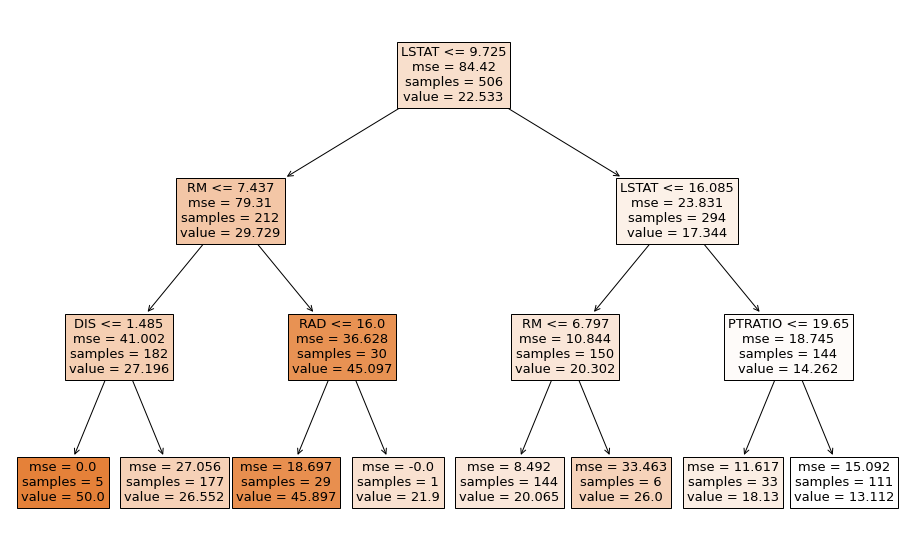

In [19]:
maxfeature_tree = DecisionTreeRegressor(max_features = 3, max_depth = 3)
maxfeature_tree.fit(X,Y)
plt.figure(figsize = (16,10))
plot_tree(maxfeature_tree, filled=True, fontsize = 13, feature_names = X.columns);

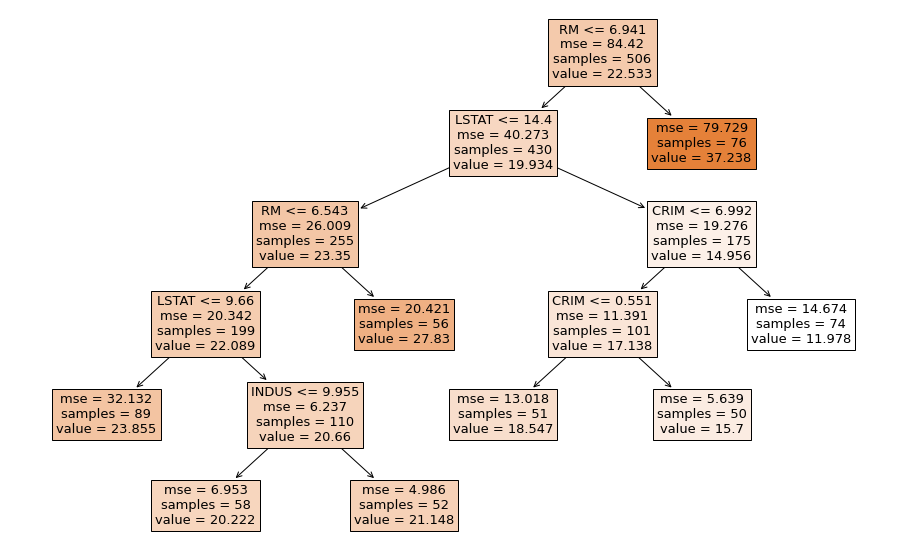

In [24]:
min_samples_tree = DecisionTreeRegressor(min_samples_leaf = 50)
min_samples_tree.fit(X,Y)
plt.figure(figsize = (16,10))
plot_tree(min_samples_tree, filled=True, fontsize = 13, feature_names = X.columns);
#I like this tree! 

In [25]:
#dealing with categorical data?
!pip install category_encoders

     |████████████████████████████████| 82 kB 954 kB/s eta 0:00:01
